<a href="https://colab.research.google.com/github/sahil-kothari/ML/blob/main/Clustering(Kmeans%2BHierarchical).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df = pd.read_csv('/content/cities_r2.csv')

In [ ]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [ ]:
df.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [ ]:
df['effective_literacy_rate_total']= df['effective_literacy_rate_total'].astype(int)
df['effective_literacy_rate_male']= df['effective_literacy_rate_male'].astype(int)
df['effective_literacy_rate_female']= df['effective_literacy_rate_female'].astype(int)

In [ ]:
df['name_of_city']= df['name_of_city'].factorize()[0]
df['state_name']= df['state_name'].factorize()[0]
df['location']= df['location'].factorize()[0]

In [ ]:
df['name_of_city']= df['name_of_city'].astype(int)
df['state_name']= df['state_name'].astype(int)
df['location']= df['location'].astype(int)

In [ ]:
df.dtypes

name_of_city                      int64
state_code                        int64
state_name                        int64
dist_code                         int64
population_total                  int64
population_male                   int64
population_female                 int64
0-6_population_total              int64
0-6_population_male               int64
0-6_population_female             int64
literates_total                   int64
literates_male                    int64
literates_female                  int64
sex_ratio                         int64
child_sex_ratio                   int64
effective_literacy_rate_total     int64
effective_literacy_rate_male      int64
effective_literacy_rate_female    int64
location                          int64
total_graduates                   int64
male_graduates                    int64
female_graduates                  int64
dtype: object

In [ ]:
X = df.iloc[:, [15, 16]].values
print(X)

[[79 85]
 [91 94]
 [80 88]
 [83 89]
 [68 76]
 [93 95]
 [63 67]
 [89 93]
 [91 95]
 [98 99]
 [87 93]
 [76 83]
 [91 94]
 [95 97]
 [96 98]
 [70 75]
 [86 90]
 [86 93]
 [88 91]
 [87 88]
 [89 93]
 [92 95]
 [88 92]
 [86 91]
 [93 95]
 [89 93]
 [85 88]
 [63 68]
 [93 96]
 [81 88]
 [78 85]
 [83 89]
 [84 89]
 [92 95]
 [86 92]
 [89 94]
 [88 92]
 [86 90]
 [92 95]
 [60 69]
 [86 92]
 [88 94]
 [90 92]
 [75 76]
 [89 91]
 [88 92]
 [86 91]
 [83 84]
 [90 93]
 [91 94]
 [83 89]
 [87 92]
 [85 90]
 [86 92]
 [81 90]
 [92 94]
 [90 93]
 [77 84]
 [89 92]
 [70 74]
 [89 93]
 [79 83]
 [89 92]
 [86 92]
 [88 91]
 [85 90]
 [85 88]
 [82 87]
 [85 93]
 [79 84]
 [90 94]
 [78 84]
 [89 92]
 [82 86]
 [90 94]
 [80 85]
 [86 91]
 [86 91]
 [81 85]
 [76 83]
 [82 90]
 [87 91]
 [85 90]
 [85 91]
 [87 93]
 [84 91]
 [83 86]
 [84 91]
 [80 88]
 [81 84]
 [84 90]
 [85 89]
 [93 95]
 [87 92]
 [90 94]
 [88 94]
 [87 92]
 [90 93]
 [74 83]
 [83 88]
 [79 87]
 [88 93]
 [84 92]
 [90 93]
 [83 90]
 [90 93]
 [73 76]
 [78 85]
 [83 90]
 [88 94]
 [81 86]
 

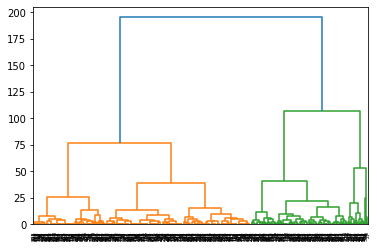

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [ ]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [ ]:
labels

array([2, 3, 2, 2, 0, 3, 0, 1, 3, 3, 1, 2, 3, 3, 3, 0, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 0, 3, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 0, 1, 1, 3, 0,
       1, 1, 1, 2, 3, 3, 2, 1, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 3, 1, 3, 1, 1, 3, 2, 2, 2, 1, 1, 3, 1, 3, 0, 2, 1, 1,
       2, 1, 2, 3, 0, 1, 3, 2, 1, 3, 1, 3, 1, 0, 1, 1, 1, 2, 3, 1, 3, 0,
       2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2,
       3, 3, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 2, 2, 3, 2, 1, 1, 2, 1, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       3, 2, 1, 0, 2, 0, 2, 3, 1, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 2, 1, 1,
       1, 2, 1, 1, 2, 2, 3, 3, 3, 1, 3, 2, 1, 1, 0,

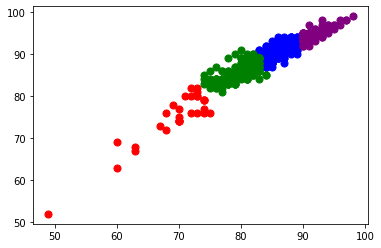

In [ ]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

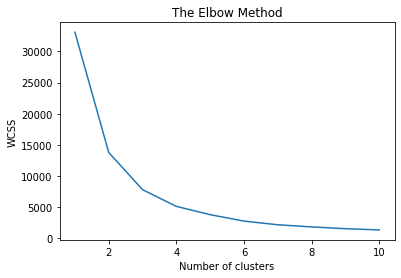

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

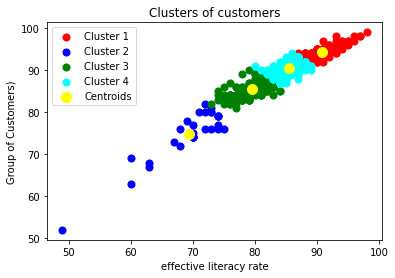

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('effective literacy rate')
plt.ylabel('Group of Customers)')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
score=metrics.silhouette_score(X, labels, metric='euclidean')
score

0.4697448984497529

In [ ]:
from sklearn import metrics
score=metrics.silhouette_score(X, y_kmeans, metric='euclidean')
score

0.4818992931281545

In [ ]:
Z = df.iloc[:, [19, 20]].values
print(Z)

[[  16287    8612]
 [   8863    5269]
 [  10565    6797]
 [  19225   12189]
 [  11902    7871]
 [  52711   30215]
 [ 185813  106082]
 [ 769858  435267]
 [  51661   29832]
 [  26832   14900]
 [  77989   42454]
 [   9745    5811]
 [  49715   28812]
 [  45971   25463]
 [  22263    9900]
 [  99341   55965]
 [ 233129  138248]
 [  58764   35297]
 [  34943   17809]
 [  20618   10689]
 [  26596   14444]
 [  97186   52224]
 [  20857   12369]
 [   7813    5076]
 [  91996   51456]
 [  11305    6579]
 [ 140359   69241]
 [  13879    7635]
 [  29803   17331]
 [  43700   27392]
 [  12666    7291]
 [  35354   25045]
 [  65625   40231]
 [  11992    7093]
 [  13141    9371]
 [ 159308   96576]
 [  51647   27742]
 [  19911   11691]
 [  25115   13878]
 [   3744    2756]
 [  14090    9038]
 [  22521   13025]
 [  32154   19679]
 [  20490   11537]
 [  17224   10311]
 [  23170   14071]
 [  16114   10252]
 [  36100   22170]
 [  12354    7562]
 [  23732   14538]
 [  24015   15215]
 [  19082   12321]
 [   8566   

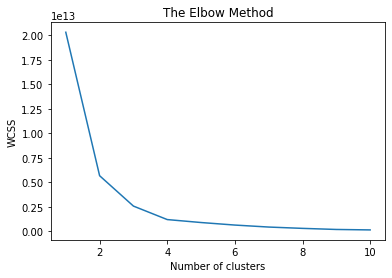

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

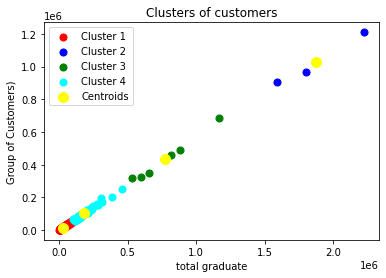

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 43)
y_kmeans = kmeans.fit_predict(Z)

# Visualising the clusters
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('total graduate')
plt.ylabel('Group of Customers)')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
score=metrics.silhouette_score(Z, y_kmeans, metric='euclidean')
score

0.8079708170511092

In [ ]:
labels = kmeans.labels_

In [ ]:
labels

array([0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn import metrics
score=metrics.silhouette_score(Z, labels, metric='euclidean')
score

0.8079708170511092